Starting Fast.AI

Upgrading the Fast AI to the Latest Version

In [1]:
!pip install -Uqq fastai

Importing all the Fast AI Vision Library

In [2]:
from fastai.vision.all import *

Downloads Pets dataset to the server extracts it and return path object with extracted location

In [3]:
path = untar_data(URLs.PETS)/'images'

Labels cats based on label name

In [4]:
def is_cat(x):
#     a file name starts with uppercase if it is cat. 
    return x[0].isupper()

What Kind of dataset we have?
ImageDataLoaders: Type of the data we have like images text,etc.
get_image_files : Return List of images files in a path.
valid_pct and seed : are used to split the data set into the validation and seed makes clear that the validation set we are taking is same every time if we change the model the results change base on model not on the basis of chaning a validation set. 
label_func: How to get the labels from the dataset.
transformers: contains code that is applied automatically during training item_tfms: applied to each each items. like each item is resized to 224. batch_tfms: batch of items at a time. 

In [5]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct = 0.2, seed = 42,
    label_func = is_cat, item_tfms = Resize(224))

Now it is a time to create a CNN. Resnet is a machine learning model we use to train our dataset. 34 in Resnet34 refers to the number of layers in this variant. A metric is a function that measures quality of model's prediction using validation set. error_rate: function provided by fast ai to tell that what %age of images are incorrect. 

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Fits the Model.

In [7]:
learn.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.160075,0.022497,0.009472,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.053759,0.018746,0.006766,00:55


Let's Download a cat's image

Installing duck duck go


In [8]:
pip install -U duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
ray 1.13.0 requires click<=8.0.4,>=7.0, but you have click 8.1.3 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Importing Duck Duck Go files


In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'dog photos'


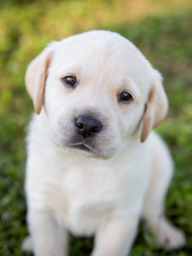

In [10]:
urls = search_images('dog photos', max_images=1)
from fastdownload import download_url
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Now Use our Model

In [11]:
iscat,_,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a: {iscat}.")
print(f"Probability it's a cat: {1 - probs[0]:.4f}")

This is a: False.
Probability it's a cat: 0.0000


Predict the above downloaded image